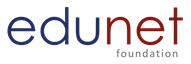

# Edunet Foundation : Class Room Exercises

# Lab: Outlier Detection and Treatment 

### Object:

The objective of the "Outlier Detection and Treatment" lab is to provide learners with the skills to identify and handle outliers in datasets using Python. The lab begins with an introduction to the concept of outliers, their impact on data analysis, and the importance of addressing them. Learners will gain hands-on experience in using libraries such as Pandas, NumPy, and Seaborn to detect outliers through statistical methods (like Z-score and IQR) and visualization techniques (like box plots and scatter plots). The lab will also cover various strategies for treating outliers, including removal, transformation, and imputation. By the end of the lab, learners will be proficient in detecting and managing outliers, ensuring the robustness and accuracy of their data analysis.

#### Step 1: Import Libraries and Load Data


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the "tips" dataset
tips = sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


#### visuvally understand the boxplot
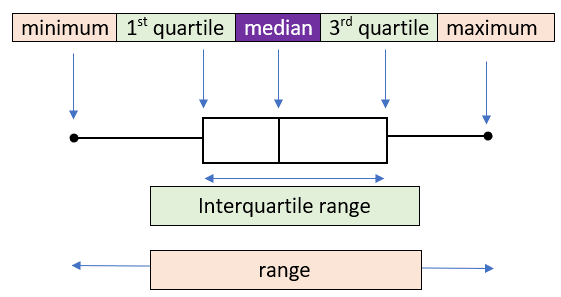

#### How to identift outliner by boxplot?
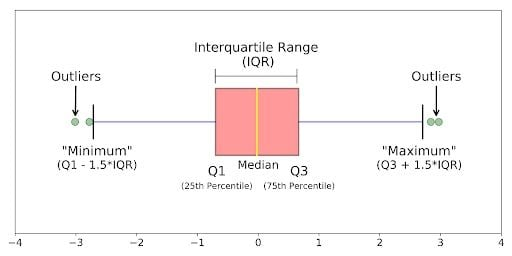

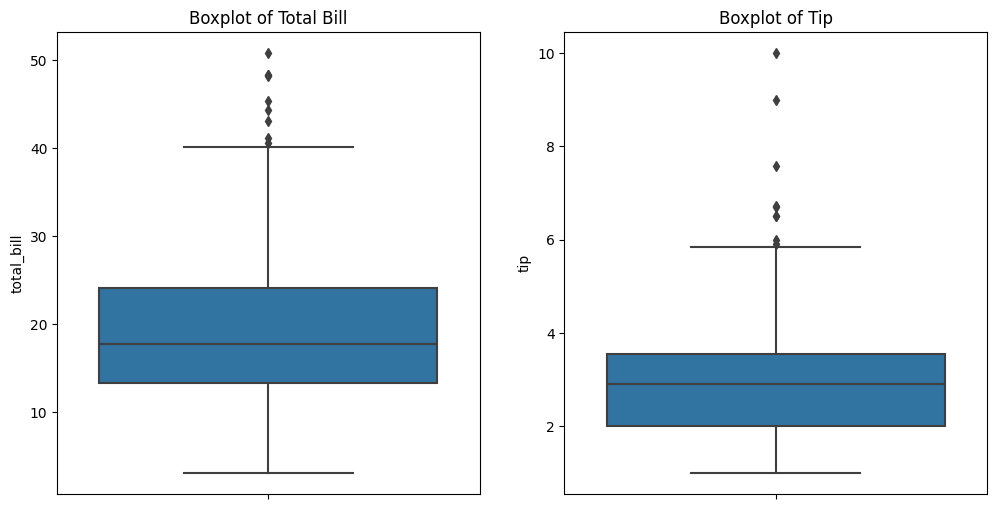

In [2]:
# Visualize the distribution of 'total_bill' and 'tip' using box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=tips['total_bill'])
plt.title('Boxplot of Total Bill')

plt.subplot(1, 2, 2)
sns.boxplot(y=tips['tip'])
plt.title('Boxplot of Tip')

plt.show()

In [3]:
# Function to identify outliers using IQR method
def find_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Identify outliers in 'total_bill'
total_bill_outliers, total_bill_lower_bound, total_bill_upper_bound = find_outliers_IQR(tips, 'total_bill')
print(f"Total Bill outliers:\n{total_bill_outliers}\n")

# Identify outliers in 'tip'
tip_outliers, tip_lower_bound, tip_upper_bound = find_outliers_IQR(tips, 'tip')
print(f"Tip outliers:\n{tip_outliers}\n")


Total Bill outliers:
     total_bill    tip     sex smoker   day    time  size
59        48.27   6.73    Male     No   Sat  Dinner     4
102       44.30   2.50  Female    Yes   Sat  Dinner     3
142       41.19   5.00    Male     No  Thur   Lunch     5
156       48.17   5.00    Male     No   Sun  Dinner     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
182       45.35   3.50    Male    Yes   Sun  Dinner     3
184       40.55   3.00    Male    Yes   Sun  Dinner     2
197       43.11   5.00  Female    Yes  Thur   Lunch     4
212       48.33   9.00    Male     No   Sat  Dinner     4

Tip outliers:
     total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
183       23.17   6.50    Male    Ye

#### Remove Outliers

In [9]:
# Removing outliers
tips_no_outliers = tips[(tips['total_bill'] >= total_bill_lower_bound) & (tips['total_bill'] <= total_bill_upper_bound) &
                        (tips['tip'] >= tip_lower_bound) & (tips['tip'] <= tip_upper_bound)]

print(f"Dataset after removing outliers:\n{tips_no_outliers.describe()}\n")


Dataset after removing outliers:
       total_bill         tip        size
count  229.000000  229.000000  229.000000
mean    18.476856    2.806332    2.484716
std      7.212792    1.085224    0.876588
min      3.070000    1.000000    1.000000
25%     13.130000    2.000000    2.000000
50%     17.260000    2.710000    2.000000
75%     22.670000    3.500000    3.000000
max     40.170000    5.850000    6.000000



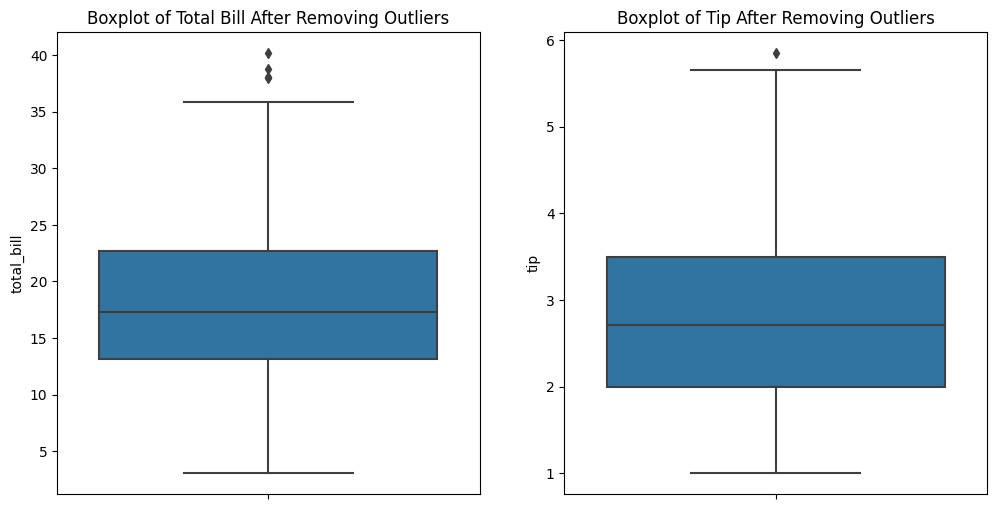

In [10]:
# Visualizing the data after handling outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=tips_no_outliers['total_bill'])
plt.title('Boxplot of Total Bill After Removing Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(y=tips_no_outliers['tip'])
plt.title('Boxplot of Tip After Removing Outliers')

plt.show()